<a href="https://colab.research.google.com/github/loki20051267/Applications-Of-Data-Mining/blob/main/ADM_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df_features = df.drop(columns=["Id", "Species"])

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [15]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

In [16]:
pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pca_df["Species"] = df["Species"]

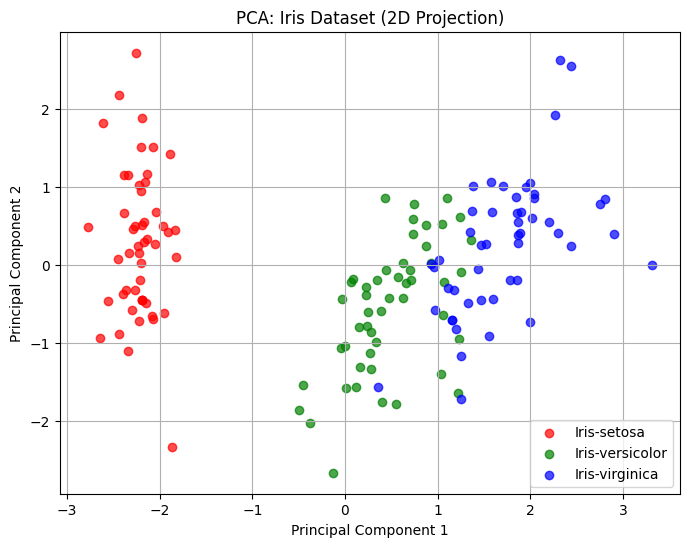

In [19]:
plt.figure(figsize=(8, 6))
colors = {"Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"}
for species in pca_df["Species"].unique():
    subset = pca_df[pca_df["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], color=colors[species], alpha=0.7, label=species)
    plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Iris Dataset (2D Projection)")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_features)

In [21]:
pca_df_3d = pd.DataFrame(principal_components_3d, columns=["PC1", "PC2","PC3"])
pca_df_3d["Species"] = df["Species"]

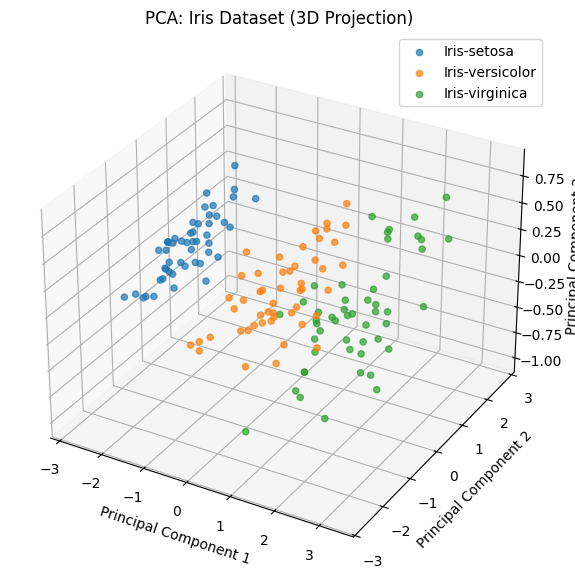

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for species in pca_df_3d["Species"].unique():
    subset = pca_df_3d[pca_df_3d["Species"] == species]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], label=species, alpha=0.7)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA: Iris Dataset (3D Projection)")
ax.legend()
plt.show()